# AlexNet
Here, I built AlexNet architecture and trained it on the CIFAR10 dataset. I resized some of the kernel sizes and the number of kernels because CIFAR100 is a smaller dataset than ImageNet, as well as lower-resolution (32x32 vs 224x224). I also resized the number of kernels used per layer to speed up training and preserves accuracy.

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Load and preprocess the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Normalize pixel values to be between 0 and 1
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split the data into training and validation sets
X_train, X_val = X_train_full[:45000], X_train_full[45000:]
y_train, y_val = y_train_full[:45000], y_train_full[45000:]

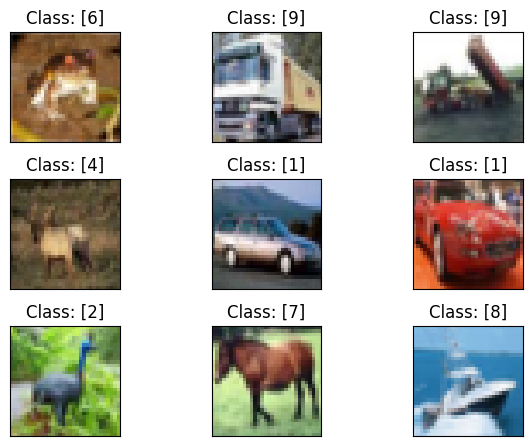

In [4]:
# Display some images
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], interpolation='none')
    plt.title('Class: {}'.format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [5]:
X_train_full.shape

(50000, 32, 32, 3)

In [ ]:
# Define the AlexNet model
def create_alexnet_model():
    model = models.Sequential()

    # First Convo Layer
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Second Convo Layer
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    # Third Convo Layer
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Fourth Convo Layer
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.25))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(10, activation='softmax'))

    return model


In [ ]:
# Create the model
model = create_alexnet_model()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 128)       5

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/50
704/704 [==============================] - 21s 15ms/step - loss: 1.8222 - accuracy: 0.3995 - val_loss: 1.4444 - val_accuracy: 0.5026
Epoch 2/50
704/704 [==============================] - 8s 12ms/step - loss: 1.2380 - accuracy: 0.5640 - val_loss: 1.8469 - val_accuracy: 0.4298
Epoch 3/50
704/704 [==============================] - 9s 13ms/step - loss: 1.0368 - accuracy: 0.6415 - val_loss: 1.1759 - val_accuracy: 0.6162
Epoch 4/50
704/704 [==============================] - 9s 13ms/step - loss: 0.9154 - accuracy: 0.6821 - val_loss: 1.2004 - val_accuracy: 0.5938
Epoch 5/50
704/704 [==============================] - 8s 12ms/step - loss: 0.8341 - accuracy: 0.7090 - val_loss: 0.9251 - val_accuracy: 0.6742
Epoch 6/50
704/704 [==============================] - 9s 13ms/step - loss: 0.7593 - accuracy: 0.7355 - val_loss: 0.7582 - val_accuracy: 0.7358
Epoch 7/50
704/704 [==============================] - 9s 13ms/step - loss: 0.7102 - accuracy: 0.7543 - val_loss: 1.2656 - val_accuracy: 0.619

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.7123 - accuracy: 0.8132 - 1s/epoch - 4ms/step
Test accuracy: 0.8131999969482422


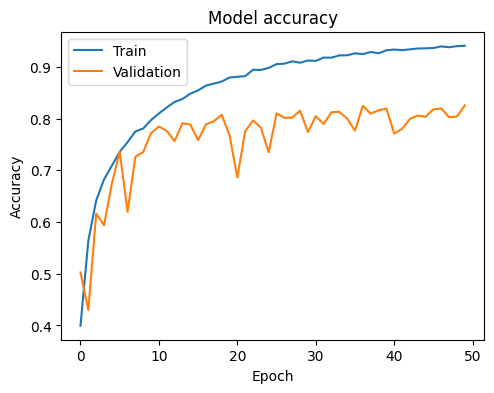

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


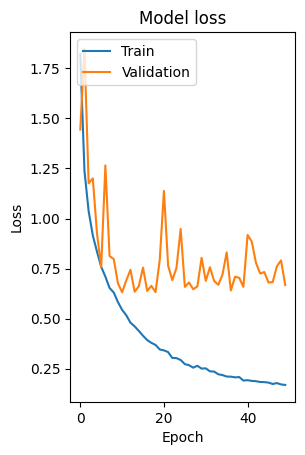

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
